<a href="https://colab.research.google.com/github/shikharmay7/minor-project/blob/master/BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
base_path = "/content/drive/My Drive/Datasets/minor_sem6/"

In [4]:
dir_list = os.listdir(base_path)
len(dir_list)

4

In [5]:
def getListOfFiles(dirName):
# create a list of file and sub directories 
# names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
# Iterate over all the entries
    for entry in listOfFile:
# Create full path
        fullPath = os.path.join(dirName, entry)
# If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles  

In [6]:
listOfFiles = getListOfFiles(base_path)

In [7]:
listOfFiles.sort()

In [8]:
listOfFiles

['/content/drive/My Drive/Datasets/minor_sem6/aman/amanLeftRight_01/scene00001.jpeg',
 '/content/drive/My Drive/Datasets/minor_sem6/aman/amanLeftRight_01/scene00002.jpeg',
 '/content/drive/My Drive/Datasets/minor_sem6/aman/amanLeftRight_01/scene00003.jpeg',
 '/content/drive/My Drive/Datasets/minor_sem6/aman/amanLeftRight_01/scene00004.jpeg',
 '/content/drive/My Drive/Datasets/minor_sem6/aman/amanLeftRight_01/scene00005.jpeg',
 '/content/drive/My Drive/Datasets/minor_sem6/aman/amanLeftRight_01/scene00006.jpeg',
 '/content/drive/My Drive/Datasets/minor_sem6/aman/amanLeftRight_01/scene00007.jpeg',
 '/content/drive/My Drive/Datasets/minor_sem6/aman/amanLeftRight_01/scene00008.jpeg',
 '/content/drive/My Drive/Datasets/minor_sem6/aman/amanLeftRight_01/scene00009.jpeg',
 '/content/drive/My Drive/Datasets/minor_sem6/aman/amanLeftRight_01/scene00010.jpeg',
 '/content/drive/My Drive/Datasets/minor_sem6/aman/amanLeftRight_01/scene00011.jpeg',
 '/content/drive/My Drive/Datasets/minor_sem6/aman/ama

In [9]:
# Importing Keras libraries
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import VGG16, ResNet50
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

Using TensorFlow backend.


In [10]:
def show_imgs(X):
    plt.figure(figsize=(8, 8))
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            image = load_img(X[k], target_size=(224, 224))
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(image)
            k = k+1
    # show the plot
    plt.show()

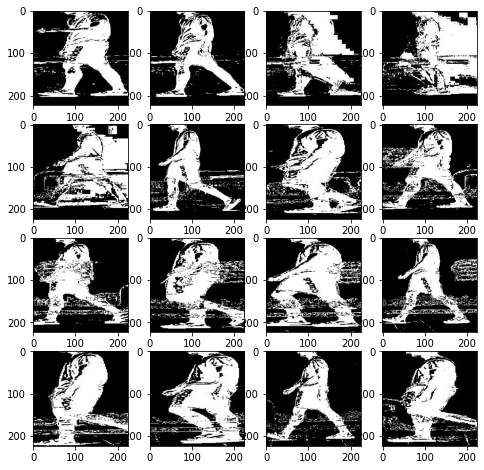

In [11]:
show_imgs(listOfFiles)

(138, 338)

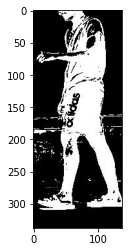

In [12]:
img = load_img(listOfFiles[0])
plt.imshow(img)
img.size

In [13]:
l=[1,2,3]
mat= np.zeros((5,5,3))
for i in range(5):
  for j in range(5):
    mat[i][j]=l

mat.shape
mat


array([[[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]])

In [25]:
Tx = 25 #the number of time steps input to the model
n_freq = 25088  #number of features input to the model
m = 20  #the number of training examples
X = np.zeros((m, Tx, n_freq))

In [17]:
model1 = VGG16(weights='imagenet', include_top = False)
model1.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [ ]:
def create_features(dataset, pre_model):
 
    x_scratch = []
 
    # loop over the images
    for imagePath in dataset:
 
        # load the input image and image is resized to 224x224 pixels 
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
 
        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)
 
    x = np.vstack(x_scratch)
    features = pre_model.predict(x, batch_size=32)
    features_flatten = features.reshape((features.shape[0], 7 * 7 * 512))
    return x, features, features_flatten

In [22]:
img = load_img(listOfFiles[0], target_size=(224,224))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = imagenet_utils.preprocess_input(img)
features = model1.predict(img)
features_flatten = features.reshape((1,7*7*512))
features_flatten.shape

(1, 25088)

In [23]:
features_flatten

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
for i in range(20):
  for j in range(25):
    k = i*25 + j
    img = load_img(listOfFiles[k], target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = imagenet_utils.preprocess_input(img)
    features = model1.predict(img)
    features_flatten = features.reshape((1,7*7*512))
    X[i][j] = features_flatten

In [28]:
X.shape

(20, 25, 25088)

In [29]:
label_dict = {0 : 'Aman', 1: 'Ankit', 2: 'Avinash', 3: 'Shikhar'}

In [30]:
Y=[]
for i in range(4):
  for j in range(125):
    Y.append(i)

In [31]:
nb_class = 4
y_hot = np_utils.to_categorical(Y, nb_class)
y_hot[:10]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [32]:
def model(input_shape):
    """
    Function creating the model's graph in Keras.
    
    Argument:
    input_shape -- shape of the model's input data (using Keras conventions)

    Returns:
    model -- Keras model instance
    """
    
    X_input = Input(shape = input_shape)
    
    # Step 1: CONV layer (≈4 lines)
    X = Conv1D(filters=196,kernel_size=15,strides=4)(X_input)                                 # CONV1D
    X = BatchNormalization()(X)                                  # Batch normalization
    X = Activation("relu")(X)                                 # ReLu activation
    X = Dropout(rate=0.8)(X)                                 # dropout (used 0.8)

    # Step 2: First GRU Layer (≈4 lines)
    X = GRU(units=128, return_sequences =True)(X)    # GRU (used 128 units and return the sequences)
    X = Dropout(rate=0.8)(X)                                   # dropout (used 0.8)
    X = BatchNormalization()(X)                                 # Batch normalization
    
    # Step 3: Second GRU Layer (≈4 lines)
    X = GRU(units=128, return_sequences =True)(X)                                 # GRU (use 128 units and return the sequences)
    X = Dropout(rate=0.8)(X)                                 # dropout (used 0.8)
    X = BatchNormalization()(X)                                  # Batch normalization
    X = Dropout(rate=0.8)(X)                                 # dropout (used 0.8)
    
    # Step 4: Time-distributed dense layer 
    X = TimeDistributed(Dense(1, activation = "sigmoid"))(X) # time distributed  (sigmoid)

    ### END CODE HERE ###

    model = Model(inputs = X_input, outputs = X)
    
    return model

In [33]:
model = model(input_shape = (Tx, n_freq))

NameError: ignored

In [ ]:
model.summary()

In [ ]:
opt = Adam(lr=0.0001, beta_1 = 0.9, beta_2 = 0.999, decay=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

In [ ]:
model.fit(X,Y, batch_size=4, epochs=5)